<a href="https://colab.research.google.com/github/Aditya-sharma112245/Fashion-CNN-Classifier/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import keras
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
(X_train, Y_train),(X_test, Y_test)=keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
print(X_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [6]:
print(X_test)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [7]:
print(Y_train)

[9 0 0 ... 3 0 5]


In [8]:
class_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

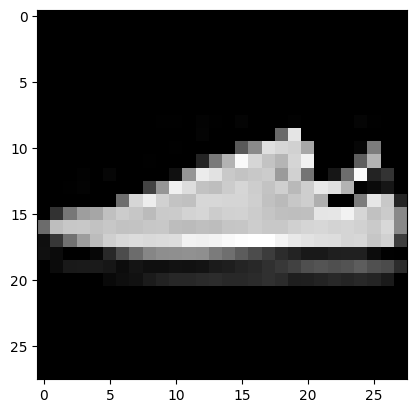

In [9]:
plt.imshow(X_train[6], cmap="gray")



In [10]:
Y_train[6]

7

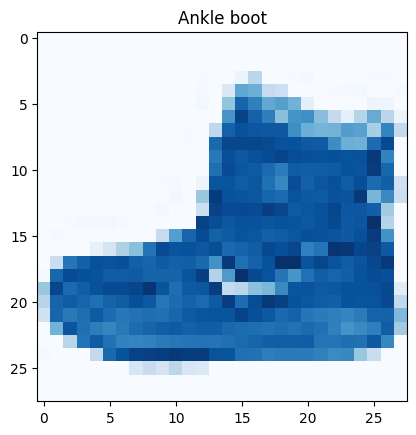

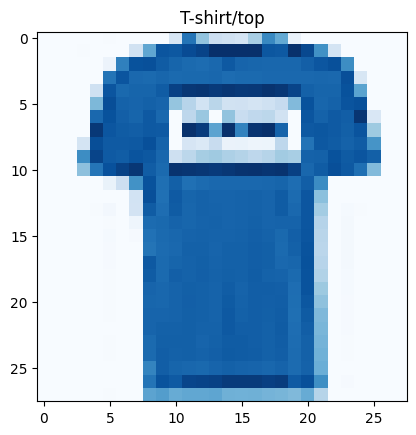

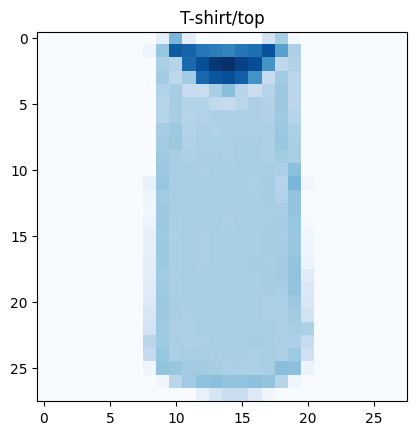

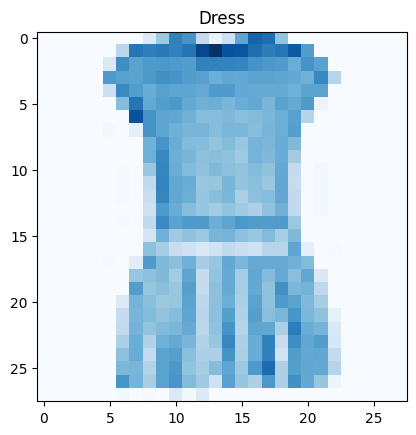

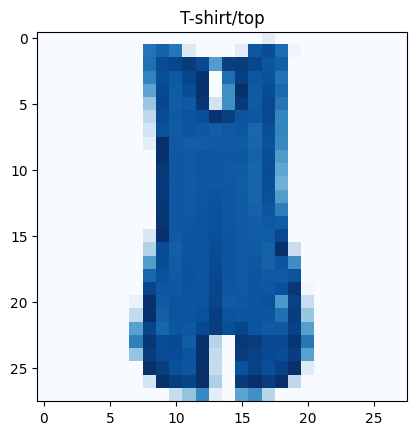

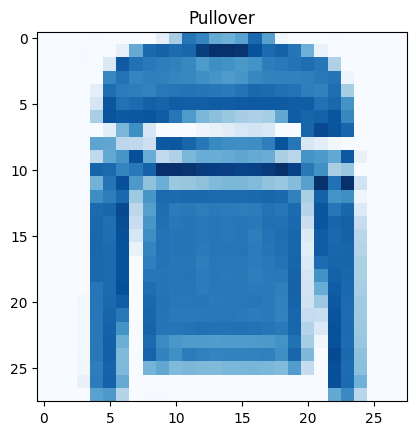

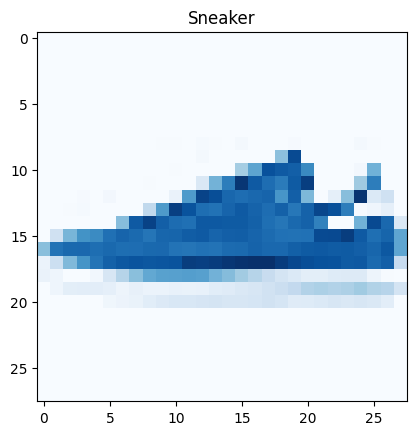

In [11]:
for i in range(7):
  plt.imshow(X_train[i],cmap='Blues')
  plt.title(class_labels[Y_train[i]])
  plt.show()

In [12]:
X_train=np.expand_dims(X_train,-1)
X_test=np.expand_dims(X_test,-1)

In [13]:
X_train=X_train/255
X_test=X_test/255

In [14]:
X_train,X_val,Y_train,Y_val=train_test_split(X_train,Y_train,test_size=0.2,random_state=2020)

In [15]:
cnn_model = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
cnn_model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


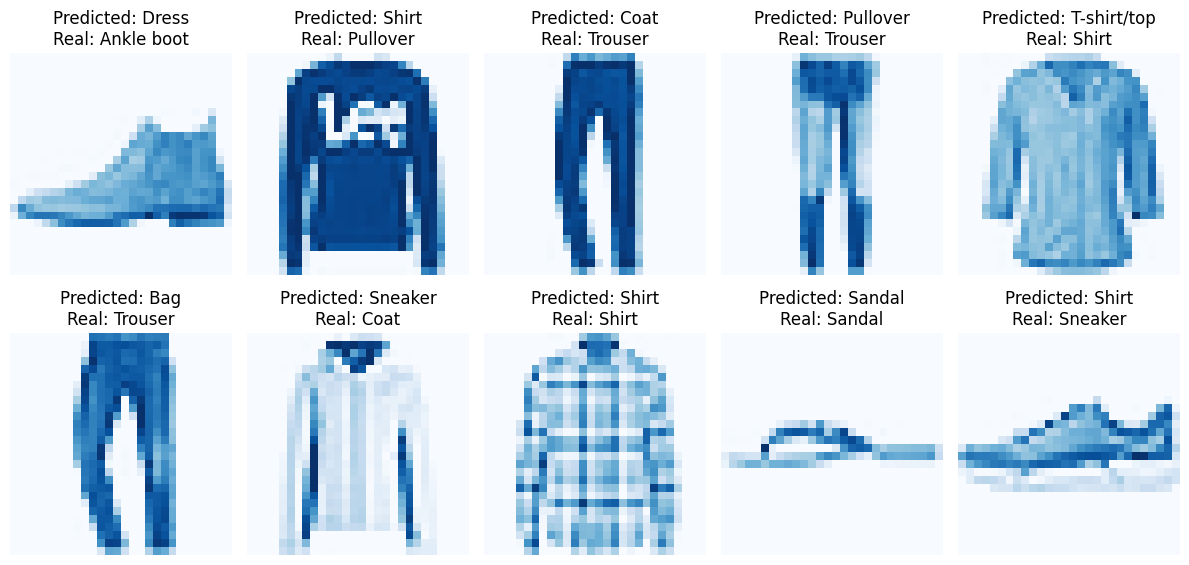

In [17]:
pred = cnn_model.predict(X_test)
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
n_images = 10
for i in range(n_images):
    ax = axes[i // 5, i % 5]


    ax.imshow(X_test[i], cmap='Blues')

    predicted_label = class_labels[np.argmax(pred[i])]
    real_label = class_labels[Y_test[i]]

    ax.set_title(f"Predicted: {predicted_label}\nReal: {real_label}")
    ax.axis('off')


plt.tight_layout()
plt.show()

In [18]:
cnn_model.fit(X_train, Y_train, epochs=10, batch_size=512, verbose=1, validation_data=(X_val, Y_val))


Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 39s 395ms/step - accuracy: 0.7005 - loss: 0.9428 - val_accuracy: 0.8519 - val_loss: 0.4262
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 33s 306ms/step - accuracy: 0.8616 - loss: 0.3978 - val_accuracy: 0.8718 - val_loss: 0.3696
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 42s 320ms/step - accuracy: 0.8817 - loss: 0.3377 - val_accuracy: 0.8783 - val_loss: 0.3531
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 42s 330ms/step - accuracy: 0.8863 - loss: 0.3192 - val_accuracy: 0.8865 - val_loss: 0.3265
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 38s 303ms/step - accuracy: 0.8956 - loss: 0.2937 - val_accuracy: 0.8893 - val_loss: 0.3161
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 41s 304ms/step - accuracy: 0.9058 - loss: 0.2689 - val_accuracy: 0.8932 - val_loss: 0.3035
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 28s 298ms/step - accuracy: 0.9081 - loss: 0.2615 - val_accuracy: 0.8995 - val_loss: 0.2906
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 30s 321ms/step - accuracy: 0.9169 - loss: 0.2393 - val_accu

In [19]:
image=X_test[0]
image=np.expand_dims(image,0)
pred=cnn_model.predict(image).round(2)
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
[[0.   0.   0.   0.   0.   0.01 0.   0.03 0.   0.96]]


In [20]:
class_labels[np.argmax(pred).round(2)]


'Ankle boot'

In [21]:
class_labels[Y_test[0]]

'Ankle boot'

In [22]:
cnn_model.evaluate(X_test,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8943 - loss: 0.2976


[0.29221299290657043, 0.8930000066757202]

In [23]:
print(class_labels[Y_test[9]])

Sneaker


In [29]:
print(Y_test.shape)

(10000,)


In [31]:
A = cnn_model.predict(X_test)
y_pred_classes = np.argmax(A, axis=1)
y_true = Y_test

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


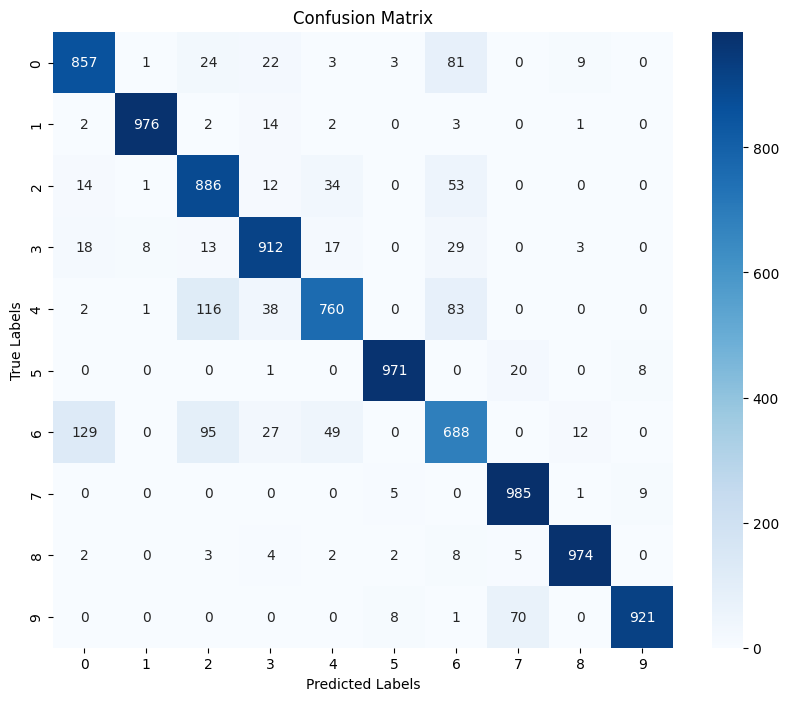

In [32]:
cm = confusion_matrix(y_true, y_pred_classes)


plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()